In [1]:
%pip install matplotlib
%pip install nlpaug
%pip install numpy
%pip install pandas
%pip install requests
%pip install scikit-learn
%pip install seaborn
%pip install tqdm
%pip install torch
%pip install transformers

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime


def formata_msg(nivel, msg):
    """
    Formata uma mensagem de log incluindo o nível de severidade, timestamp
    e a mensagem.

    Parâmetros:
    - nivel (str): Nível de severidade da mensagem (ex: 'INFO', 'ERROR', 'WARNING').
    - msg (str): A mensagem de log propriamente dita.

    Retorna:
    - str: A mensagem de log formatada.
    """
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    return f"[{nivel}] {timestamp} - {msg}"


def plotar_distribuicao_polaridade(df):
    polarity_counts = df["polarity"].value_counts()

    sns.barplot(
        x=polarity_counts.index,
        y=polarity_counts,
        hue=polarity_counts.index,
        legend=False,
    )

    # plt.yticks([], [])
    plt.xlabel("")
    plt.ylabel("")
    sns.despine(left=True)

    for container in plt.gca().containers:
        plt.gca().bar_label(container)

In [3]:
import os
import matplotlib.pyplot as plt
import nlpaug.augmenter.word as naw
import numpy as np
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
import seaborn as sns
from tqdm import tqdm
import torch

print(formata_msg("INFO", "TESTE"))

c:\Users\jean_\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] 2025-05-02 18:05:36 - TESTE


In [4]:
corpora_caminho = './corpora'

if not os.path.exists(corpora_caminho):
    os.mkdir(corpora_caminho)

print(f"Diretório {corpora_caminho} criado com sucesso")

Diretório ./corpora criado com sucesso


In [5]:
def baixarArquivo(arquivo_nome, url):
    arquivo_caminho = os.path.join(corpora_caminho, arquivo_nome)

    parametros = {"downloadformat": "csv"}

    resposta = requests.get(url, params=parametros)

    if resposta.status_code == 200:
        with open(arquivo_caminho, "wb") as f:
            f.write(resposta.content)
        print(f"Download do {arquivo_nome} foi concluído")

        return arquivo_caminho
    else:
        print(
            f"Falha no download do arquivo {arquivo_nome}. Status code: {resposta.status_code}"
        )


buscape_arquivo = "buscape-comentarios.csv"

buscape_caminho = os.path.join(corpora_caminho, buscape_arquivo)

url = "https://raw.githubusercontent.com/gomesluiz/product-review-analytics/main/data/raw/buscape.csv"

baixarArquivo(buscape_arquivo, url)

Download do buscape-comentarios.csv foi concluído


'./corpora\\buscape-comentarios.csv'

In [6]:
colunas_desejadas = ["review_text", "polarity"]
buscape_df = pd.read_csv(buscape_caminho, usecols=colunas_desejadas)

num_rows, num_cols = buscape_df.shape[0], buscape_df.shape[1]

print(formata_msg("INFO", f"{num_rows} {num_cols}"))

[INFO] 2025-05-02 18:05:40 - 84991 2


In [7]:
buscape_df.dropna(inplace=True)

num_rows, num_cols = buscape_df.shape[0], buscape_df.shape[1]

print(formata_msg("INFO", f"{num_rows} {num_cols}"))

[INFO] 2025-05-02 18:05:40 - 73626 2


In [8]:
buscape_df.head()

,review_text,polarity
0,"Estou muito satisfeito, o visor é melhor do qu...",1.0
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",1.0
2,"Rápida, ótima qualidade de impressão e fácil d...",1.0
3,Produto de ótima qualidade em todos os quesito!,1.0
4,Precisava comprar uma tv compatível com meu dv...,1.0


In [9]:
buscape_df['polarity'] = buscape_df['polarity'].astype(int)

buscape_df.head()

,review_text,polarity
0,"Estou muito satisfeito, o visor é melhor do qu...",1
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",1
2,"Rápida, ótima qualidade de impressão e fácil d...",1
3,Produto de ótima qualidade em todos os quesito!,1
4,Precisava comprar uma tv compatível com meu dv...,1


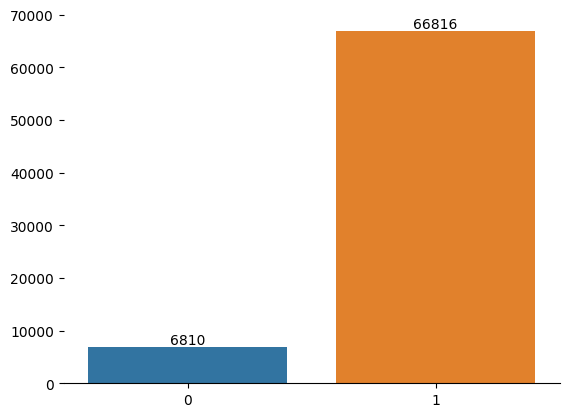

In [10]:
plotar_distribuicao_polaridade(buscape_df)

In [11]:
texto = buscape_df.iloc[5]['review_text'].replace('\n',' ')

print(texto)

eu adorei este secador é muito bom,potente e deixa meu cabelo lindo


In [13]:
enriquecedor = naw.ContextualWordEmbsAug(
    model_path="neuralmind/bert-base-portuguese-cased", action="insert"
)

print(texto)

for ii in range(5):
    print(enriquecedor.augment(texto))

eu adorei este secador é muito bom,potente e deixa meu cabelo lindo
['eu adorei este cabo secador é produto muito bom, super potente funciona e deixa hoje meu cabelo totalmente lindo']
['eu adorei este secador é sim muito bom, é potente e nos deixa com meu pequeno cabelo super lindo']
['eu adorei é este desse secador que é muito bom, potente e me deixa bem meu cabelo muito lindo']
['eu simplesmente adorei este secador é original muito bom, potente e eficiente deixa bem meu bom cabelo fica lindo']
['Nossa eu adorei particularmente este secador é muito bom, potente demais e realmente deixa no meu segundo cabelo lindo']


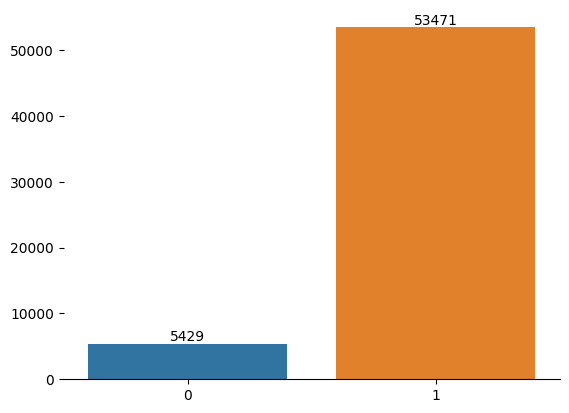

In [16]:
train, test = train_test_split(buscape_df, test_size=0.2, random_state=42)

plotar_distribuicao_polaridade(train)

In [33]:
def enriquecer_texto(
    enriquecedor: naw.ContextualWordEmbsAug,
    df: pd.DataFrame,
    classe,
    amostras=100,
    prob_aug=0.2,
):
    enriquecedor.aug_p = prob_aug

    textos_enriquecidos = []

    df_minoritario = df[df.polarity == classe].reset_index(drop=True)

    for i in tqdm(np.random.randint(0, len(df_minoritario), amostras)):
        texto = df_minoritario.iloc[i]["review_text"]
        texto_enriquecido = enriquecedor.augment(texto)
        textos_enriquecidos.append(texto_enriquecido)

    df_enriquecido = pd.DataFrame(
        {"review_text": textos_enriquecidos, "polarity": classe}
    )
    df_resultante = pd.concat([df, df_enriquecido], ignore_index=True).sample(
        frac=1, random_state=42
    )

    return df_resultante

In [38]:
train_enriquecido = enriquecer_texto(enriquecedor, train, 0, amostras=10)

100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


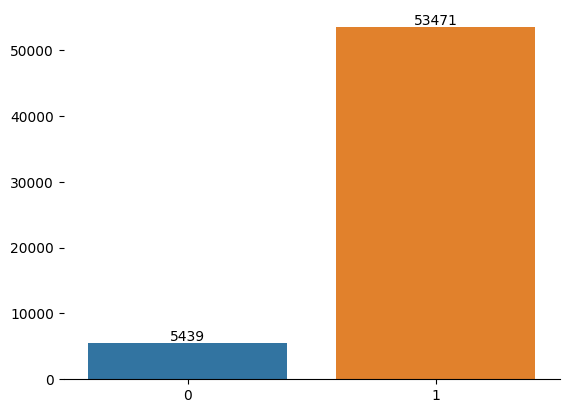

In [39]:
plotar_distribuicao_polaridade(train_enriquecido)